aliasing y los patrones de moire


Patrones Moire

El término Moiré, el cual proviene del francés, es un tipo particular de textil en seda que posee una apariencia ondeante o fluctuante, debido a los patrones de interferencia formados por la estructura del tejido.

El efecto Moiré se produce de igual forma en la fotografía, el vídeo e incluso la impresión; en fotos y vídeos, se trata de un efecto que se produce cuando captamos con una cámara un objeto que tiene una composición de líneas verticales muy finas, como por ejemplo una chaqueta, una camiseta, o un objeto decorativo, etc., mientras que en la fotografía digital se puede dar por una serie de problemas que son producidos por la condición de elementos digitales que dependen de circuitos electrónicos.

Efecto aliasing

El efecto aliasing se produce cuando los pixeles no pueden captar todos los detalles de la imagen, ya sea en detalles en una imagen estática o sus cambios durante el movimiento, por lo general, cuando se adquiere una cámara, uno espera como usuario que la cantidad de pixeles sea la necesaria para reproducir los detalles de las imágenes, sin embargo existen patrones que tiene secuencias de alta precisión que no llegan a ser suficientes. Dentro de la fotografía de naturaleza o en retratos es poco probable encontrarse con este efecto, porque requiere de una figura que se repite, pero puede estar presente en estructuras arquitectónicas y en ciertos tipos de telas o superficies.


Referencias

NIIXER : https://niixer.com/index.php/2021/04/16/el-patron-moire-y-el-antialiasing/

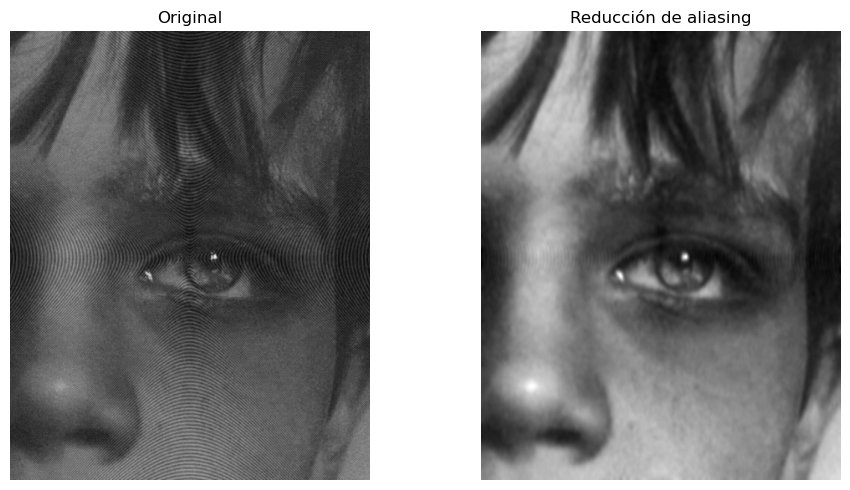

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('imagen1.jpeg', cv2.IMREAD_GRAYSCALE)


img_gauss = cv2.GaussianBlur(img, (9, 15), 0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Reducción de aliasing')
plt.imshow(img_gauss, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


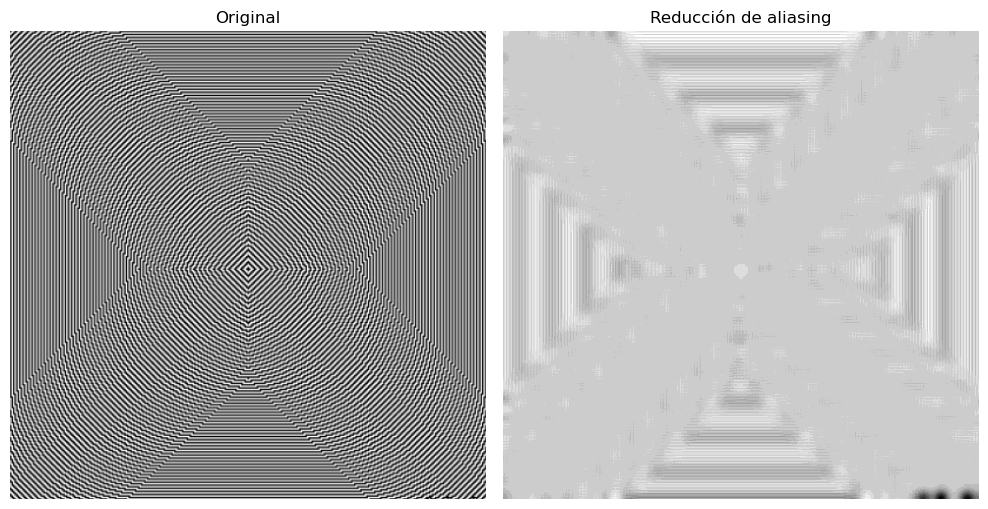

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('imagen2.jpeg', cv2.IMREAD_GRAYSCALE)


img_gauss = cv2.GaussianBlur(img, (33, 33), 0)


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Reducción de aliasing')
plt.imshow(img_gauss, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


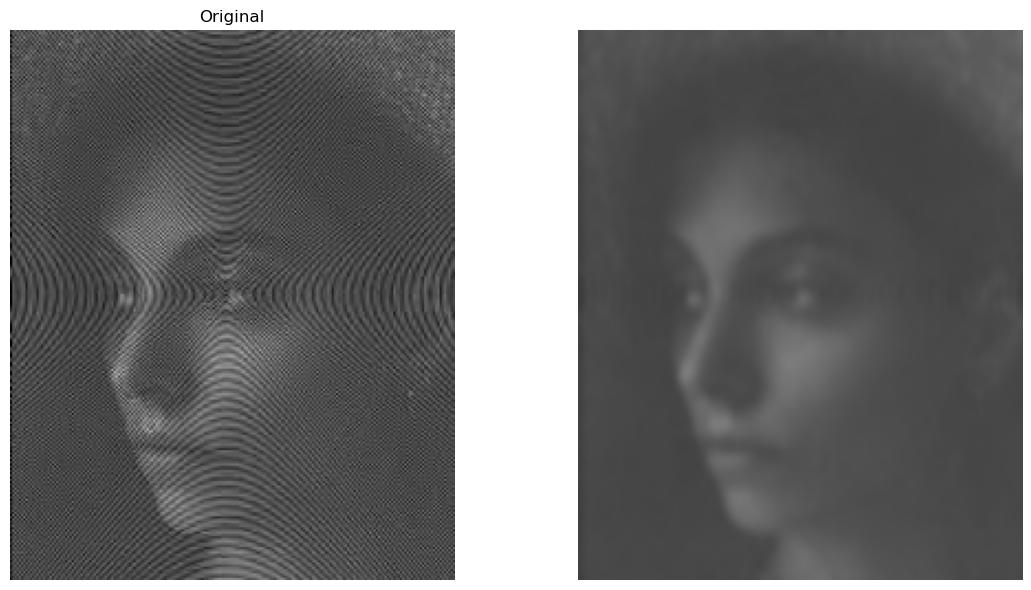

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


imagen = cv2.imread('imagen3.jpeg')
img_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)


img_desenfocada = cv2.GaussianBlur(img_rgb, (9, 13), 0)


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_desenfocada)
plt.axis('off')

plt.tight_layout()
plt.show()


Convolucion Diagonal

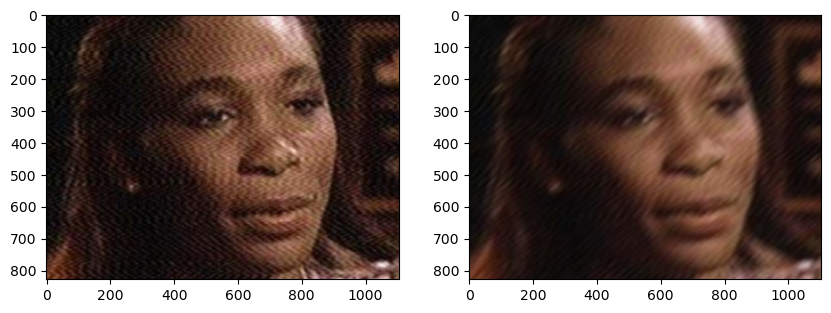

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convolucion_media_diagonal_xy(imagen, tamanioKernel):
    kernel = np.zeros((tamanioKernel, tamanioKernel), np.float32)
    for i in range(tamanioKernel):
        kernel[i, tamanioKernel - i - 1] = 1.0
    kernel /= tamanioKernel
    imgfin = cv2.filter2D(imagen, -1, kernel)
    return imgfin

imagen = cv2.imread('distorsionada.jpeg')
img_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

imgrest_r = convolucion_media_diagonal_xy(img_rgb[:, :, 0], 25)
imgrest_g = convolucion_media_diagonal_xy(img_rgb[:, :, 1], 25)
imgrest_b = convolucion_media_diagonal_xy(img_rgb[:, :, 2], 25)

imgcolor = np.stack([imgrest_r, imgrest_g, imgrest_b], axis=2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)

plt.subplot(1, 2, 2)
plt.imshow(imgcolor)

plt.show()